# Stack Overflow: Tag Prediction

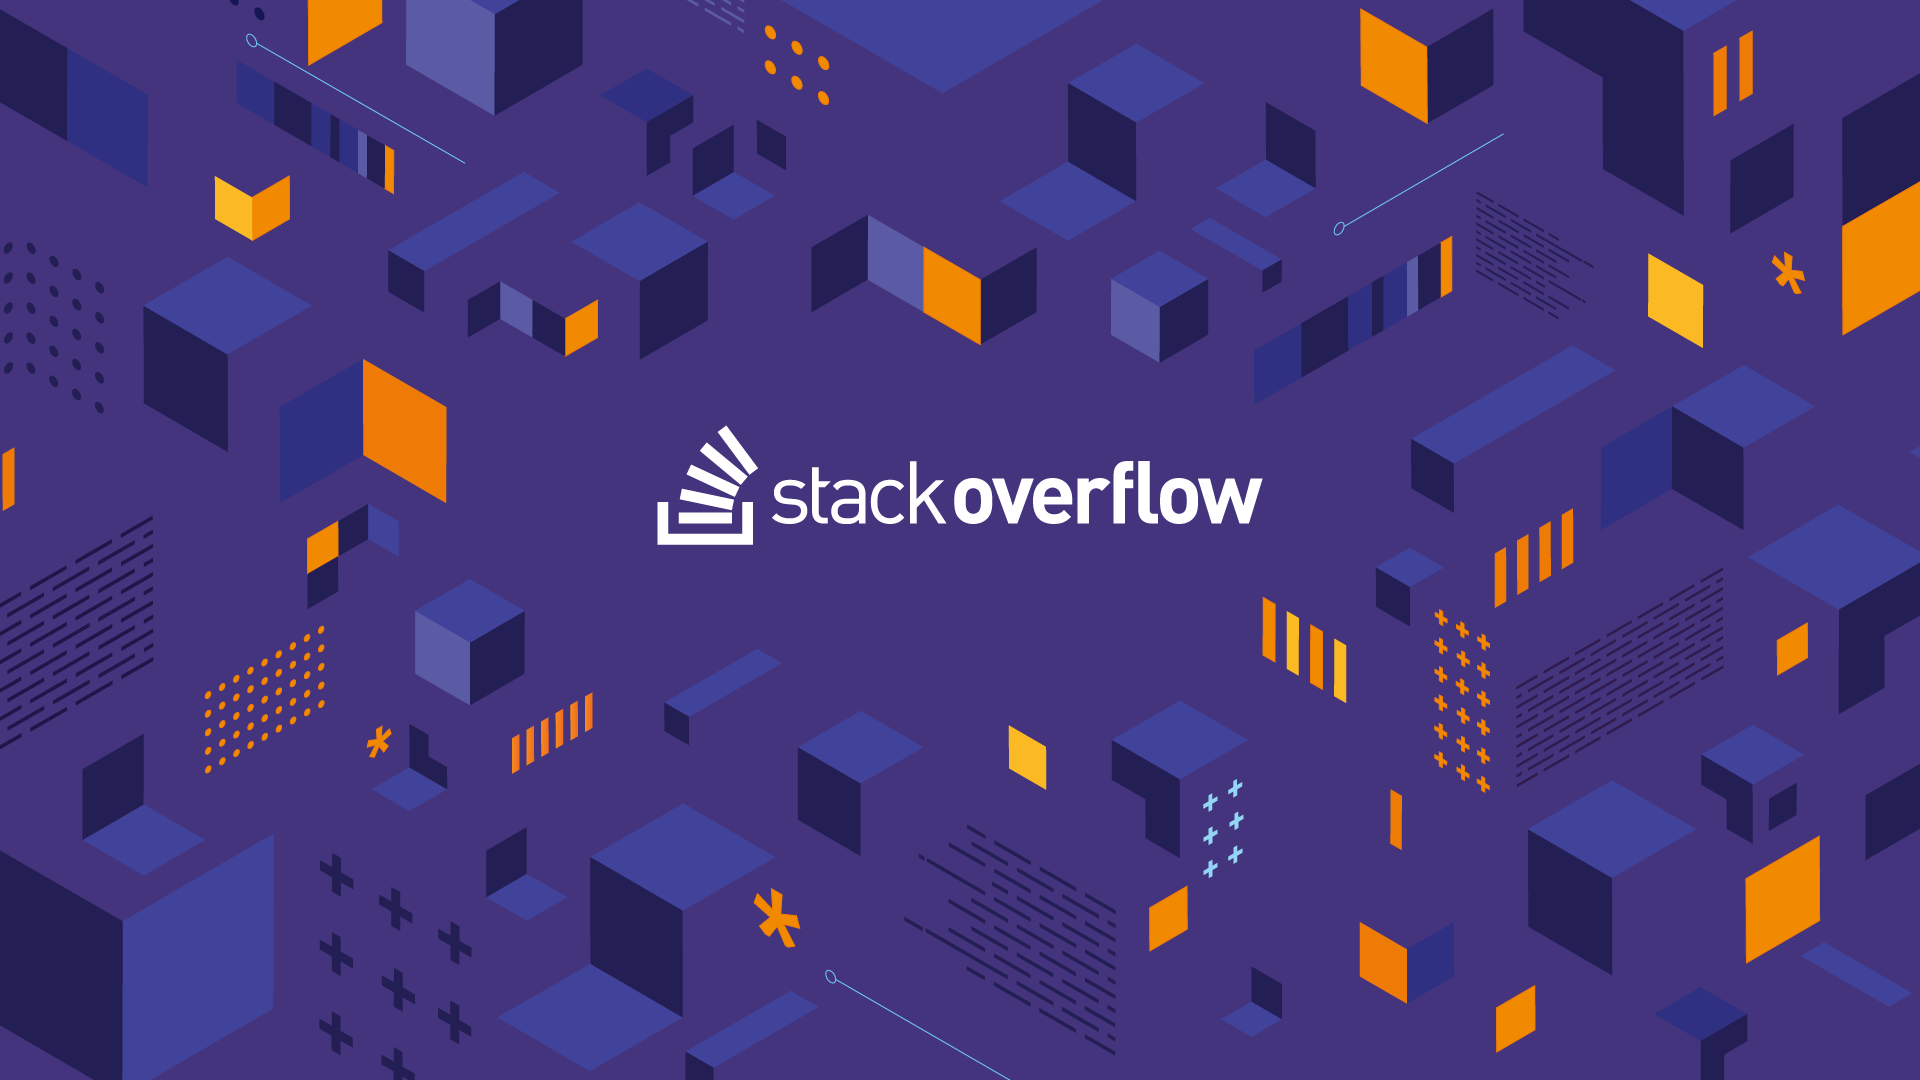

<h1>1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p style='font-size:18px'><b> Description </b></p>
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the tags based on the content that was there in the question posted on Stackoverflow.

<p style='font-size:18px'><b> Source:  </b> https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/</p>


<h2> 1.2 Source / useful links </h2>

Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data <br>
Youtube : https://youtu.be/nNDqbUhtIRg <br>
Research paper : https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/tagging-1.pdf <br>
Research paper : https://dl.acm.org/citation.cfm?id=2660970&dl=ACM&coll=DL

<h2> 1.3 Real World / Business Objectives and Constraints </h2>

1. Predict as many tags as possible with high precision and recall.
2. Incorrect tags could impact customer experience on StackOverflow.
3. No strict latency constraints.

<h1>2. Machine Learning problem </h1>

<h2> 2.1 Data </h2>

<h3> 2.1.1 Data Overview </h3>

# Mounting Google Drive locally

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>
The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).<br />
<br />


__Data Field Explaination__

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

<br />

<h3>2.1.2 Example Data point </h3>

<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

<h2>2.2 Mapping the real-world problem to a Machine Learning Problem </h2>

<h3> 2.2.1 Type of Machine Learning Problem </h3>

<p> It is a multi-label classification problem  <br>
<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these. <br>
__Credit__: http://scikit-learn.org/stable/modules/multiclass.html
</p>

<h3>2.2.2 Performance metric </h3>

<b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>

<b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>

<b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>
> If there is an imbalanced dataset, obviously we go for F1 score than simple accuracy. Micro F1 score prioritize higher frequent class label and tries to maximize the precision and recall for the same while giving less importance to precision and recall for lower frequent class label. Where as Macro F1 score prioritize all class labels equal and tries to maximize precision and recall for all the class labels.
Which metric to use depends on the objective we want to achieve.
There are some cases where predicting for lower frequent label is important aswell like predicting a rare disease which appears less in our training dataset. In this case we choose Macro F1 score.
In our case study, since we are predicting multiple labels, the chance of the query belonging to higher frequent lables(like Java, C etc..) is more than the lower frequent labels like (mainframe, powerbi etc..). So we priorities the precision and recalls for higher frequent labels here.


https://www.kaggle.com/wiki/MeanFScore <br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html <br>
<br>
<b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>
https://www.kaggle.com/wiki/HammingLoss <br>

# Using Kaggle Datasets in Google Colab

Reference: https://stackoverflow.com/questions/49310470/using-kaggle-datasets-in-google-colab

https://www.kaggle.com/general/51898

In [2]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ishritam","key":"b83c9df9dff7ed7ed5b821857665b419"}'}

In [3]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Aug 25 11:30 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# List available datasets. ---->   !kaggle datasets list
#--------------------------------> !kaggle competitions list

In [6]:
!kaggle competitions list -s facebook-recruiting-iii-keyword-extraction

ref                                         deadline             category     reward  teamCount  userHasEntered  
------------------------------------------  -------------------  -----------  ------  ---------  --------------  
facebook-recruiting-iii-keyword-extraction  2013-12-20 23:59:00  Recruitment    Jobs        367            True  


In [7]:
!kaggle competitions download -c facebook-recruiting-iii-keyword-extraction

 99% 2.17G/2.19G [00:13<00:00, 170MB/s]
100% 2.19G/2.19G [00:13<00:00, 172MB/s]
100% 722M/725M [00:04<00:00, 161MB/s]
100% 725M/725M [00:04<00:00, 172MB/s]
 93% 73.0M/78.7M [00:00<00:00, 172MB/s]
100% 78.7M/78.7M [00:00<00:00, 177MB/s]


In [0]:
#Now refered to this: https://www.kaggle.com/general/74235
#! mkdir 'train_data'

In [8]:
! unzip Train.zip 

Archive:  Train.zip
  inflating: Train.csv               


<h1> 3. Exploratory Data Analysis </h1>

<h2> 3.1 Data Loading and Cleaning </h2>

In [9]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 3.4MB/s 


In [0]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sqlite3
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import re
import os
from sqlalchemy import create_engine # database connection
import datetime as dt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from skmultilearn.adapt import mlknn
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB
from datetime import datetime

<h2> 3.1 Data Loading and Cleaning </h2>

<h3>3.1.1 Using Pandas with SQLite to Load the data</h3>

In [11]:
#Creating db file from csv
#Learn SQL: https://www.w3schools.com/sql/default.asp
if not os.path.isfile('train.db'):
    start = datetime.now()
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('Train.csv', names=['Id', 'Title', 'Body', 'Tags'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows ---> '.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1
    print("Time taken to run this cell :", datetime.now() - start)

180000 rows ---> 
360000 rows ---> 
540000 rows ---> 
720000 rows ---> 
900000 rows ---> 
1080000 rows ---> 
1260000 rows ---> 
1440000 rows ---> 
1620000 rows ---> 
1800000 rows ---> 
1980000 rows ---> 
2160000 rows ---> 
2340000 rows ---> 
2520000 rows ---> 
2700000 rows ---> 
2880000 rows ---> 
3060000 rows ---> 
3240000 rows ---> 
3420000 rows ---> 
3600000 rows ---> 
3780000 rows ---> 
3960000 rows ---> 
4140000 rows ---> 
4320000 rows ---> 
4500000 rows ---> 
4680000 rows ---> 
4860000 rows ---> 
5040000 rows ---> 
5220000 rows ---> 
5400000 rows ---> 
5580000 rows ---> 
5760000 rows ---> 
5940000 rows ---> 
6120000 rows ---> 
Time taken to run this cell : 0:03:44.923299


The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [12]:
if os.path.isfile('train.db'):
    start = datetime.now()
    con = sqlite3.connect('train.db')
    num_rows = pd.read_sql_query("""SELECT count(*) FROM data""", con)
    #Always remember to close the database
    print("Number of rows in the database :","\n",num_rows['count(*)'].values[0])
    con.close()
    print("Time taken to count the number of rows :", datetime.now() - start)
else:
    print("Please download the train.db file from drive or run the above cell to genarate train.db file")

Number of rows in the database : 
 6034196
Time taken to count the number of rows : 0:00:00.049287


<h3>3.1.3 Checking for duplicates </h3>

In [13]:
start = datetime.now()
con = sqlite3.connect('train.db')
df_no_dup = pd.read_sql_query('SELECT Title, Body, Tags, COUNT(*) as cnt_dup FROM data GROUP BY Title, Body, Tags', con)
con.close()
 
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:01:11.522875


In [0]:
df_no_dup.shape

(4206315, 4)

In [0]:
df_no_dup.head(3)

,Title,Body,Tags,cnt_dup
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1


In [0]:
import pickle
file = df_no_dup
dbfile = open('/content/gdrive/My Drive/Dataset/pkcl/df_no_dup', 'wb')
pickle.dump(file, dbfile) 

In [0]:
pkl_file = open('/content/gdrive/My Drive/Dataset/pkcl/df_no_dup', 'rb')
df_no_dup = pickle.load(pkl_file)
pkl_file.close()

In [0]:
df_no_dup.shape

(4206315, 4)

In [0]:
print("number of duplicate questions :", num_rows['count(*)'].values[0]- df_no_dup.shape[0], "(",(1-((df_no_dup.shape[0])/(num_rows['count(*)'].values[0])))*100,"% )")

In [0]:
# number of times each question appeared in our database
df_no_dup.cnt_dup.value_counts()

1    2656284
2    1272336
3     277575
4         90
5         25
6          5
Name: cnt_dup, dtype: int64

In [0]:
df_no_dup.dropna(how='any',axis=0,inplace=True)

In [15]:
start = datetime.now()
df_no_dup["tag_count"] = df_no_dup["Tags"].apply(lambda text: len(text.split(' ') if text is not None else '0' ))
# adding a new feature number of tags per question
print("Time taken to run this cell :", datetime.now() - start)
df_no_dup.head()


Time taken to run this cell : 0:00:02.875964


,Title,Body,Tags,cnt_dup,tag_count
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1,2
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1,3
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1,4
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1,2
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2,2


In [0]:
# distribution of number of tags per question
df_no_dup.tag_count.value_counts()

3    1206157
2    1111706
4     814996
1     568291
5     505158
Name: tag_count, dtype: int64

In [0]:
#Creating a new database with no duplicates
if not os.path.isfile('train_no_dup.db'):
    disk_dup = create_engine("sqlite:///train_no_dup.db")
    no_dup = pd.DataFrame(df_no_dup, columns=['Title', 'Body', 'Tags'])
    no_dup.to_sql('no_dup_train',disk_dup)  
    

In [20]:
conn=sqlite3.connect('train_no_dup.db')
no_dup=pd.read_sql_query('Select Title,Body,Tags from no_dup_train',conn)
conn.close() 
no_dup.head()

,Title,Body,Tags
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc


In [19]:
tag_data=pd.DataFrame(no_dup,columns=['Tags'])
tag_data.head()

,Tags
0,c++ c
1,c# silverlight data-binding
2,c# silverlight data-binding columns
3,jsp jstl
4,java jdbc


In [0]:
file = tag_data
dbfile = open('/content/gdrive/My Drive/Dataset/pkcl/tag_data', 'wb')
pickle.dump(file, dbfile) 


In [0]:
import pickle
file = open('/content/gdrive/My Drive/Dataset/pkcl/tag_data', 'rb')
tag_data = pickle.load(file)

<h2> 3.2 Analysis of Tags </h2>

<h3> 3.2.1 Total number of unique tags </h3>

In [0]:
# Importing & Initializing the "CountVectorizer" object, which 
#is scikit-learn's bag of words tool.

#by default 'split()' will tokenize each tag using space.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of strings.
tag_dtm = vectorizer.fit_transform(tag_data['Tags'])

In [21]:
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

Number of data points : 4206308
Number of unique tags : 42048


In [22]:
#'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tags we have :", tags[:10])

Some of the tags we have : ['.a', '.app', '.asp.net-mvc', '.aspxauth', '.bash-profile', '.class-file', '.cs-file', '.doc', '.drv', '.ds-store']


<h3> 3.2.3 Number of times a tag appeared </h3>

In [0]:
# https://stackoverflow.com/questions/15115765/how-to-access-sparse-matrix-elements
#Lets now store the document term matrix in a dictionary.
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [24]:
lst=[]
for key, value in result.items():
    lst.append([key,value])
lst[0]    
    

['.a', 18]

In [25]:
#converting list of list to dataframe
tag_df=pd.DataFrame(lst,columns=['Tags','Counts'])
tag_df.head()

,Tags,Counts
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138


In [0]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

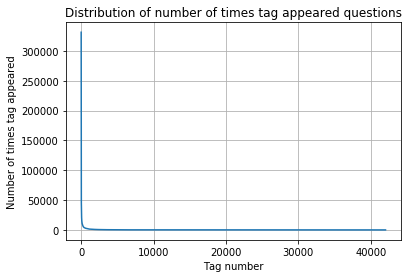

In [30]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

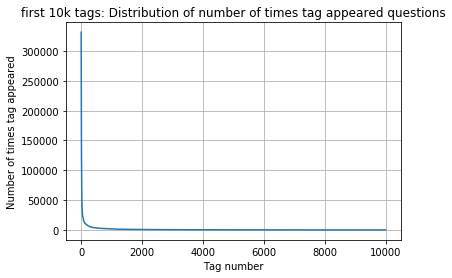

400 [331505  44829  22429  17728  13364  11162  10029   9148   8054   7151
   6466   5865   5370   4983   4526   4281   4144   3929   3750   3593
   3453   3299   3123   2986   2891   2738   2647   2527   2431   2331
   2259   2186   2097   2020   1959   1900   1828   1770   1723   1673
   1631   1574   1532   1479   1448   1406   1365   1328   1300   1266
   1245   1222   1197   1181   1158   1139   1121   1101   1076   1056
   1038   1023   1006    983    966    952    938    926    911    891
    882    869    856    841    830    816    804    789    779    770
    752    743    733    725    712    702    688    678    671    658
    650    643    634    627    616    607    598    589    583    577
    568    559    552    545    540    533    526    518    512    506
    500    495    490    485    480    477    469    465    457    450
    447    442    437    432    426    422    418    413    408    403
    398    393    388    385    381    378    374    370    367    365
  

In [31]:
plt.plot(tag_counts[0:10000])
plt.title('first 10k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:10000:25]), tag_counts[0:10000:25])

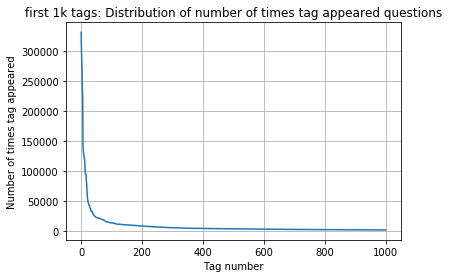

200 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483
   3453   3427   3396   3363   3326   3299   3272   3232   3196   3168
   3123   3094   3073   3050   3012   2986   2983   2953   2934   2903
   2891   2844   2819   2784   2754   2738   2726   2708   2681   2669
   2647   2621   2604   2594   2556   2527   2510   2482   2460   2444
  

In [32]:
plt.plot(tag_counts[0:1000])
plt.title('first 1k tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:1000:5]), tag_counts[0:1000:5])

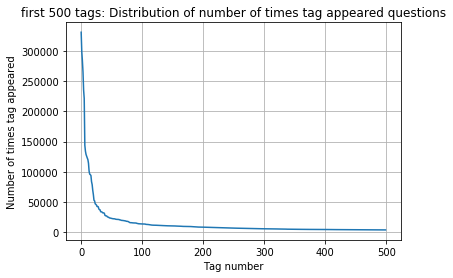

100 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703
  13364  13157  12407  11658  11228  11162  10863  10600  10350  10224
  10029   9884   9719   9411   9252   9148   9040   8617   8361   8163
   8054   7867   7702   7564   7274   7151   7052   6847   6656   6553
   6466   6291   6183   6093   5971   5865   5760   5577   5490   5411
   5370   5283   5207   5107   5066   4983   4891   4785   4658   4549
   4526   4487   4429   4335   4310   4281   4239   4228   4195   4159
   4144   4088   4050   4002   3957   3929   3874   3849   3818   3797
   3750   3703   3685   3658   3615   3593   3564   3521   3505   3483]


In [33]:
plt.plot(tag_counts[0:500])
plt.title('first 500 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()
print(len(tag_counts[0:500:5]), tag_counts[0:500:5])

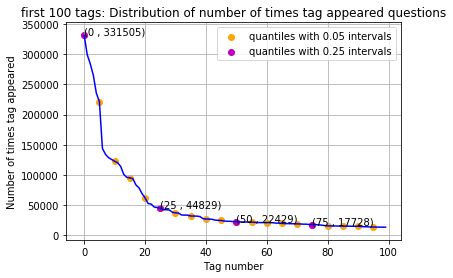

20 [331505 221533 122769  95160  62023  44829  37170  31897  26925  24537
  22429  21820  20957  19758  18905  17728  15533  15097  14884  13703]


In [34]:
plt.plot(tag_counts[0:100], c='b')
plt.scatter(x=list(range(0,100,5)), y=tag_counts[0:100:5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=list(range(0,100,25)), y=tag_counts[0:100:25], c='m', label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)), tag_counts[0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500))

plt.title('first 100 tags: Distribution of number of times tag appeared questions')
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.legend()
plt.show()
print(len(tag_counts[0:100:5]), tag_counts[0:100:5])

In [27]:
# Store tags greater than 10K in one list
lst_tags_gt_10k = tag_df[tag_df.Counts>10000].Tags
#Print the length of the list
print ('{} Tags are used more than 10000 times'.format(len(lst_tags_gt_10k)))
# Store tags greater than 100K in one list
lst_tags_gt_100k = tag_df[tag_df.Counts>100000].Tags
#Print the length of the list.
print ('{} Tags are used more than 100000 times'.format(len(lst_tags_gt_100k)))

153 Tags are used more than 10000 times
14 Tags are used more than 100000 times


<b>Observations:</b><br />
1. There are total 153 tags which are used more than 10000 times.
2. 14 tags are used more than 100000 times.
3. Most frequent tag (i.e. c#) is used 331505 times.
4. Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate metric for this probelm.

<h3> 3.2.4 Tags Per Question </h3>

In [28]:
#Storing the count of tag in each question in list 'tag_count'
tag_quest_count = tag_dtm.sum(axis=1).tolist()
#Converting list of lists into single list, we will get [[3], [4], [2], [2], [3]] and we are converting this to [3, 4, 2, 2, 3]
tag_quest_count=[int(j) for i in tag_quest_count for j in i]
print ('We have total {} datapoints.'.format(len(tag_quest_count)))

print(tag_quest_count[:5])

We have total 4206308 datapoints.
[2, 3, 4, 2, 2]


In [0]:
print( "Maximum number of tags per question: %d"%max(tag_quest_count))
print( "Minimum number of tags per question: %d"%min(tag_quest_count))
print( "Avg. number of tags per question: %f"% ((sum(tag_quest_count)*1.0)/len(tag_quest_count)))

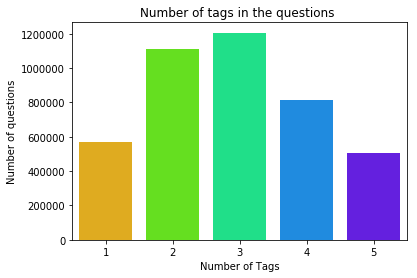

In [0]:
sns.countplot(tag_quest_count, palette='gist_rainbow')
plt.title("Number of tags in the questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

<b>Observations:</b><br />
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.899
4. Most of the questions are having 2 or 3 tags

<h3>3.2.5 Most Frequent Tags </h3>

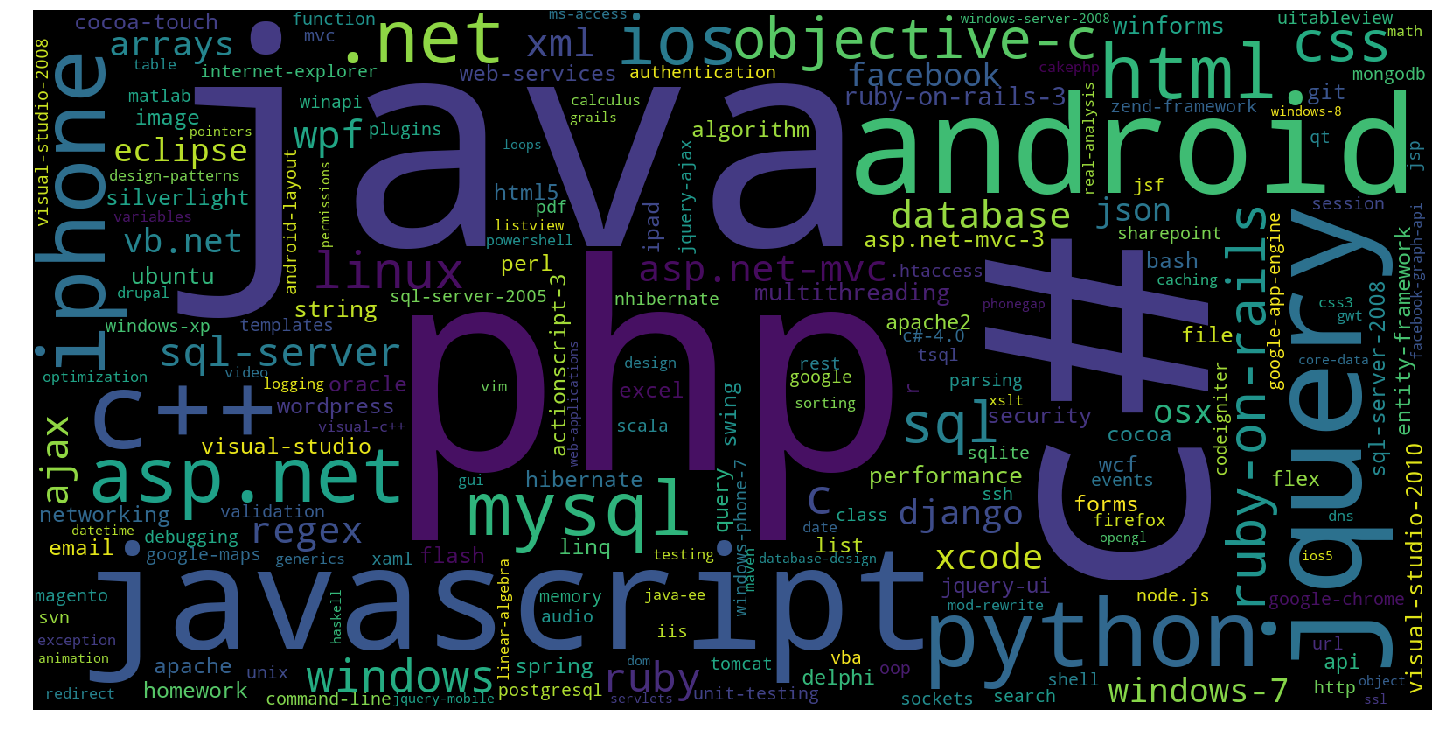

In [0]:
# Ploting word cloud


# Lets first convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())
#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(tup)

fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


<b>Observations:</b><br />
A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.

<h3> 3.2.6 The top 20 tags </h3>

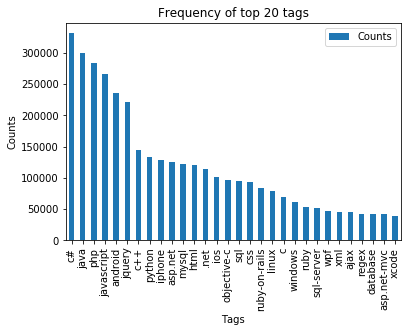

In [0]:
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar')
plt.title('Frequency of top 20 tags')
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C# is the top most frequent programming language.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

<h3> 3.3 Cleaning and preprocessing of Questions </h3>

<h3> 3.3.1 Preprocessing </h3>

<ol> 
    <li> Sample 60k data points </li>
    <li> Separate out code-snippets from Body </li>
    <li> Remove Spcial characters from Question title and description (not in code)</li>
    <li> Remove stop words (Except 'C') </li>
    <li> Remove HTML Tags </li>
    <li> Convert all the characters into small letters </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
def striphtml(data):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(data))
    return cleantext
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [31]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("Processed_new.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [32]:
# http://www.sqlitetutorial.net/sqlite-delete/
# https://stackoverflow.com/questions/2279706/select-random-row-from-a-sqlite-table
start = datetime.now()
read_db = 'train_no_dup.db'
write_db = 'Processed_new.db'
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 60000;")

if os.path.isfile(write_db):
    conn_w = create_connection(write_db)   
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")
print("Time taken to run this cell :", datetime.now() - start)

Tables in the databse:
QuestionsProcessed
Cleared All the rows
Time taken to run this cell : 0:00:26.707683


In [33]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
#http://www.bernzilla.com/2008/05/13/selecting-a-random-row-from-an-sqlite-table/

start = datetime.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:

    is_code = 0

    title, question, tags = row[0], row[1], row[2]

    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x

    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))

    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=striphtml(question.encode('utf-8'))

    title=title.encode('utf-8')

    question=str(title)+" "+str(question)
    question=re.sub(r'[^A-Za-z]+',' ',question)
    words=word_tokenize(str(question.lower()))

    #Removing all single letter and and stopwords from question exceptt for the letter 'c'
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))

    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%60000==0):
        print("number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: %d"%((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", datetime.now() - start)

Avg. length of questions(Title+Body) before processing: 1179
Avg. length of questions(Title+Body) after processing: 328
Percent of questions containing code: 57
Time taken to run this cell : 0:01:19.318148


In [35]:
questions_proccesed 

59999

In [0]:
# dont forget to close the connections, or else you will end up with locks
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

In [37]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
conn_r.commit()
conn_r.close()

Questions after preprocessed
('start eclips juno get frustrat problem eclips mani time quit frank think eclips garbag sinc android develop altern ide problem start eclips chang absolut noth sudden log file metada throw follow stacktrac error messag applic error stack njava lang nullpointerexcept org eclips ui intern workbench workbench processhierarchi workbench java org eclips ui intern workbench workbench init workbench java org eclips ui intern workbench workbench workbench java org eclips ui intern workbench swt applic create workbench applic java org eclips ui intern workbench run workbench java org eclips core databind observ realm runwithdefault realm java org eclips ui intern workbench createandrunworkbench workbench java org eclips ui platformui createandrunworkbench platformui java org eclips ui intern ide applic ideappl start ideappl java org eclips equinox intern app eclipseapphandl run eclipseapphandl java org eclips core runtim intern adaptor eclipseapplaunch runappl ecli

In [0]:
#Taking 60k entries to a dataframe.

if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.commit()
conn_r.close()

In [0]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

In [0]:
#Taking 60k entries to a dataframe.

if os.path.isfile('Processed_new.db'):
    conn_r = create_connection('Processed_new.db')
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.commit()
conn_r.close()

In [41]:
preprocessed_data.head()

,question,tags
0,asp net mvc mobil view render iphon browser pr...,asp.net-mvc mobile asp.net-mvc-4 views
1,start eclips juno get frustrat problem eclips ...,eclipse
2,javascript fullscreen api plugin found plugin ...,javascript api plugins
3,bridg transfer data possibl duplic bridg work ...,kernel
4,fix window instal window rc realli see much di...,windows-7


In [42]:
print("number of data points in sample :", preprocessed_data.shape[0])
print("number of dimensions :", preprocessed_data.shape[1])

number of data points in sample : 59999
number of dimensions : 2


<h1>4. Machine Learning Models </h1>

<h2> 4.1 Converting tags for multilabel problems </h2>

<table>
<tr>
<th>X</th><th>y1</th><th>y2</th><th>y3</th><th>y4</th>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>1</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>1</td><td>0</td><td>0</td><td>0</td>
</tr>
<tr>
<td>x1</td><td>0</td><td>1</td><td>0</td><td>0</td>
</tr>
</table>

In [0]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary='true')
multilabel_y = vectorizer.fit_transform(preprocessed_data['tags'])

__ We will sample the number of tags instead considering all of them (due to limitation of computing power) __

In [0]:
def tags_to_choose(n):
    t = multilabel_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_yn=multilabel_y[:,sorted_tags_i[:n]]
    return multilabel_yn

def questions_explained_fn(n):
    multilabel_yn = tags_to_choose(n)
    x= multilabel_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [0]:
questions_explained = []
total_tags=multilabel_y.shape[1]
total_qs=preprocessed_data.shape[0]
for i in range(500, total_tags, 100):
    questions_explained.append(np.round(((total_qs-questions_explained_fn(i))/total_qs)*100,3))

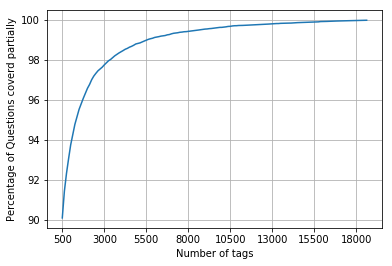

with  500 tags we are covering  90.098 % of questions


In [46]:
fig, ax = plt.subplots()
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.xlabel("Number of tags")
plt.ylabel("Percentage of Questions coverd partially")
plt.grid()
plt.show()
# you can choose any number of tags based on your computing power, minimun is 50(it covers 90% of the tags)
print("with ",500,"tags we are covering ",questions_explained[0],"% of questions")

In [47]:
multilabel_yx = tags_to_choose(500)
print("number of questions that are not covered :", questions_explained_fn(500),"out of ", total_qs)

number of questions that are not covered : 5941 out of  59999


In [48]:
print("Number of tags in sample :", multilabel_y.shape[1])
print("number of tags taken :", multilabel_yx.shape[1],"(",(multilabel_yx.shape[1]/multilabel_y.shape[1])*100,"%)")

Number of tags in sample : 15075
number of tags taken : 500 ( 3.316749585406302 %)


__ We consider top 3% tags which covers  90% of the questions __

<h2>4.2 Split the data into test and train (80:20) </h2>

In [0]:
total_size=preprocessed_data.shape[0]
train_size=int(0.80*total_size)

x_train=preprocessed_data.head(train_size)
x_test=preprocessed_data.tail(total_size - train_size)

y_train = multilabel_yx[0:train_size,:]
y_test = multilabel_yx[train_size:total_size,:]

In [50]:
print("Number of data points in train data :", y_train.shape)
print("Number of data points in test data :", y_test.shape)

Number of data points in train data : (47999, 500)
Number of data points in test data : (12000, 500)


In [0]:
import pickle

In [0]:
file = x_train
dbfile = open('/content/gdrive/My Drive/Dataset/pkcl/x_train_60k', 'wb')
pickle.dump(file, dbfile)
dbfile.close() 

filee = x_test
dbfilee = open('/content/gdrive/My Drive/Dataset/pkcl/x_test_60k', 'wb')
pickle.dump(filee, dbfilee) 
dbfile.close() 

file = y_train
dbfile = open('/content/gdrive/My Drive/Dataset/pkcl/y_train_60k', 'wb')
pickle.dump(file, dbfile)
dbfile.close()  

file = y_test
dbfile = open('/content/gdrive/My Drive/Dataset/pkcl/y_test_60k', 'wb')
pickle.dump(file, dbfile) 
dbfile.close() 

In [0]:
pkl_file = open('/content/gdrive/My Drive/Dataset/pkcl/x_train_60k', 'rb')
x_train = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('/content/gdrive/My Drive/Dataset/pkcl/x_test_60k', 'rb')
x_test = pickle.load(pkl_file)
pkl_file.close()


pkl_file = open('/content/gdrive/My Drive/Dataset/pkcl/y_train_60k', 'rb')
y_train = pickle.load(pkl_file)
pkl_file.close()



pkl_file = open('/content/gdrive/My Drive/Dataset/pkcl/y_test_60k', 'rb')
y_test = pickle.load(pkl_file)
pkl_file.close()

<h2>Bag Of Words upto 4 grams</h2>

### Using bag of words upto 4 grams and computing the micro f1 score with Logistic regression(OvR)

In [53]:
start = datetime.now()
vectorizer = CountVectorizer(min_df=0.00009, max_features=20000, tokenizer = lambda x: x.split(), ngram_range=(1,4))
x_train_multilabel = vectorizer.fit_transform(x_train['question'])
x_test_multilabel = vectorizer.transform(x_test['question'])
print("Time taken to run this cell :", datetime.now() - start)

Time taken to run this cell : 0:00:58.524704


In [0]:
file = x_train_multilabel
dbfile = open('/content/gdrive/My Drive/Dataset/pkcl/x_train_multilabel_60k', 'wb')
pickle.dump(file, dbfile)
dbfile.close()  

file = x_test_multilabel
dbfile = open('/content/gdrive/My Drive/Dataset/pkcl/x_test_multilabel_60k', 'wb')
pickle.dump(file, dbfile) 
dbfile.close() 

In [0]:
pkl_file = open('/content/gdrive/My Drive/Dataset/pkcl/x_train_multilabel_60k', 'rb')
x_train_multilabel = pickle.load(pkl_file)
pkl_file.close()



pkl_file = open('/content/gdrive/My Drive/Dataset/pkcl/x_test_multilabel_60k', 'rb')
x_test_multilabel = pickle.load(pkl_file)
pkl_file.close()

## Logistic Regression using One Vs Rest 

### Hyperparamter tuning using Grid search

In [0]:
from tqdm import tqdm_notebook as tqdm

In [64]:
alpha = [10**i for i in range(-8,3)]

for i in tqdm(alpha):
    start = datetime.now()
    classifier = OneVsRestClassifier(SGDClassifier(loss='log', alpha=i, penalty='l1'))
    classifier.fit(x_train_multilabel, y_train)
    predictions = classifier.predict(x_test_multilabel)

    print("Alpha : ",i)
    print("Accuracy :",metrics.accuracy_score(y_test, predictions))
    print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


    precision = precision_score(y_test, predictions, average='micro')
    recall = recall_score(y_test, predictions, average='micro')
    f1 = f1_score(y_test, predictions, average='micro')

    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')

    print("Macro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
    print("Time taken to run this iteration :", datetime.now() - start)
    print("-*-"*60)

Alpha :  1e-08
Accuracy : 0.12366666666666666
Hamming loss  0.004784666666666666
Micro-average quality numbers
Precision: 0.3478, Recall: 0.3731, F1-measure: 0.3600
Macro-average quality numbers
Precision: 0.2503, Recall: 0.2870, F1-measure: 0.2608
Time taken to run this iteration : 0:07:39.101673
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Alpha :  1e-07
Accuracy : 0.1195
Hamming loss  0.005040166666666667
Micro-average quality numbers
Precision: 0.3265, Recall: 0.3738, F1-measure: 0.3485
Macro-average quality numbers
Precision: 0.2362, Recall: 0.2873, F1-measure: 0.2519
Time taken to run this iteration : 0:10:28.942373
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Alpha :  1e-06
Accuracy : 0.10258333333333333
Hamming

In [66]:
start = datetime.now()
model = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.0001, penalty='l1'))
model.fit(x_train_multilabel,y_train)
pred=model.predict(x_test_multilabel)
print("Time taken to run :", datetime.now() - start)

Time taken to run : 0:09:48.491707


In [67]:
print("accuracy :",metrics.accuracy_score(y_test,pred))
print("macro f1 score :",metrics.f1_score(y_test, pred, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, pred, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,pred))
print("Precision recall report :\n",metrics.classification_report(y_test, pred))

accuracy : 0.12058333333333333
macro f1 score : 0.3016659549057658
micro f1 scoore : 0.3953559159890421
hamming loss : 0.004635
Precision recall report :
               precision    recall  f1-score   support

           0       0.42      0.32      0.37       948
           1       0.59      0.52      0.55       807
           2       0.62      0.61      0.61       801
           3       0.59      0.47      0.52       756
           4       0.76      0.80      0.78       667
           5       0.69      0.70      0.70       634
           6       0.41      0.42      0.41       374
           7       0.61      0.69      0.65       398
           8       0.47      0.46      0.47       350
           9       0.68      0.71      0.69       363
          10       0.52      0.53      0.53       348
          11       0.35      0.27      0.30       359
          12       0.25      0.16      0.20       314
          13       0.43      0.37      0.40       289
          14       0.37      0.38 

## Linear SVM using One Vs Rest 

In [0]:
alpha = [10**i for i in range(-6,2)]

In [74]:
for i in tqdm(alpha):
    start = datetime.now()
    classifier = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=i, penalty='l1'))
    classifier.fit(x_train_multilabel, y_train)
    predictions = classifier.predict(x_test_multilabel)

    print("Alpha : ",i)
    print("Accuracy :",metrics.accuracy_score(y_test, predictions))
    print("Hamming loss ",metrics.hamming_loss(y_test,predictions))


    precision = precision_score(y_test, predictions, average='micro')
    recall = recall_score(y_test, predictions, average='micro')
    f1 = f1_score(y_test, predictions, average='micro')

    print("Micro-average quality numbers")
    print(f"Precision: {precision}, Recall: {recall}, F1-measure: {f1}")

    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    print()

    print("Macro-average quality numbers")
    print(f"Precision: {precision}, Recall: {recall}, F1-measure: {f1}")
    print("Time taken to run this iteration :", datetime.now() - start)
    print("-*-"*20)

Alpha :  1e-06
Accuracy : 0.1015
Hamming loss  0.005766
Micro-average quality numbers
Precision: 0.28200208690969064, Recall: 0.38709975511712796, F1-measure: 0.3262969309861349

Macro-average quality numbers
Precision: 0.20867800824355157, Recall: 0.29839641505718406, F1-measure: 0.23862377084368205
Time taken to run this iteration : 0:12:40.131501
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Alpha :  1e-05
Accuracy : 0.08508333333333333
Hamming loss  0.006756
Micro-average quality numbers
Precision: 0.24468228871050568, Recall: 0.41828766806819756, F1-measure: 0.30875481736639265

Macro-average quality numbers
Precision: 0.17792082877072612, Recall: 0.3363375865820335, F1-measure: 0.22601974488528892
Time taken to run this iteration : 0:12:39.221134
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Alpha :  0.0001
Accuracy : 0.11208333333333333
Hamming loss  0.0047605
Micro-average quality numbers
Precision: 0.36187624750499003, Recall: 0.4188421198539944, 

In [79]:
start = datetime.now()
model = OneVsRestClassifier(SGDClassifier(loss='hinge', alpha=0.001, penalty='l1'))
model.fit(x_train_multilabel,y_train)
pred = model.predict(x_test_multilabel)
print("Time taken to run :", datetime.now() - start)

Time taken to run : 0:04:06.370633


In [81]:
print("accuracy :",metrics.accuracy_score(y_test,pred))
print("macro f1 score :",metrics.f1_score(y_test, pred, average = 'macro'))
print("micro f1 scoore :",metrics.f1_score(y_test, pred, average = 'micro'))
print("hamming loss :",metrics.hamming_loss(y_test,pred))
print("Precision recall report :\n",metrics.classification_report(y_test, pred))

accuracy : 0.17733333333333334
macro f1 score : 0.20142976400466417
micro f1 scoore : 0.39000031604563695
hamming loss : 0.0032168333333333333
Precision recall report :
               precision    recall  f1-score   support

           0       0.43      0.02      0.03       948
           1       0.68      0.46      0.55       807
           2       0.75      0.61      0.67       801
           3       0.69      0.45      0.55       756
           4       0.85      0.72      0.78       667
           5       0.83      0.66      0.73       634
           6       0.68      0.18      0.29       374
           7       0.89      0.67      0.76       398
           8       0.77      0.33      0.46       350
           9       0.78      0.69      0.73       363
          10       0.71      0.46      0.56       348
          11       0.00      0.00      0.00       359
          12       0.00      0.00      0.00       314
          13       0.44      0.12      0.19       289
          14       

## Procedures and Observations

In [1]:
from prettytable import PrettyTable
x = PrettyTable(['Model','Hyper parameter (Alpha)','Accuracy','Macro f1-score','Micro f1-score','Hamming Loss'])
x.add_row(['Logistic Regression','0.0001','12.05','30.16','39.53','0.004635'])
x.add_row(['Linear SVM','0.001','17.73','20.14','39.0','0.0032'])
print(x)

+---------------------+-------------------------+----------+----------------+----------------+--------------+
|        Model        | Hyper parameter (Alpha) | Accuracy | Macro f1-score | Micro f1-score | Hamming Loss |
+---------------------+-------------------------+----------+----------------+----------------+--------------+
| Logistic Regression |          0.0001         |  12.05   |     30.16      |     39.53      |   0.004635   |
|      Linear SVM     |          0.001          |  17.73   |     20.14      |      39.0      |    0.0032    |
+---------------------+-------------------------+----------+----------------+----------------+--------------+


## Observation

**Step_1:** As the dataset was present in Kaggle, I took some reference from web and use kaggle dataset in Google Colab.

**Step_2:** Analyze data and determine features that can be built using the dataset

**Step_3:** For feature extraction TFIDF and BOW is used.

**Step_4:** Split data into Test and Train data.(80:20)

**Step_5:** Used bag of words upto 4 grams and computed the micro f1 score with Logistic regression(OvR)

**Step_6:** Applied Logistic Regression and Linear-SVM.

**Step_7:** Found the corresponding Micro F1 score in each model.